# **Maximing Redemption Points**

With the holiday sales upon us and all of us looking for great deals, I decided to redeem credit card points to purchase some Apple products. *Yes, I'm an Apple fanboy.*

This notebook shows how I used data to determine the best value for my points.

In [4]:
# import all required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data

Data collection required looking up the item in the redemption site, matching it up with the Apple product to find the current price on the Apple website.

*Notes:*
*   Points & prices as on Nov 18th, 2023
*   The M2 MacBook Pro is no longer available to order, so required some Googling to find historical price
*   10% discounted gift card, offer valid until Jan 1st, 2024

In [5]:
# load data from csv
df = pd.read_csv('files/data.csv')

With 49,037 points to redeem, this is a simple query to find the product(s) to redeem.

In [6]:
# find all eligible giftcards
giftcard_list = df[:3]
giftcard_list = giftcard_list[giftcard_list['points'] < 49037]
print(f'Use points to order {len(giftcard_list)} items')
giftcard_list

Use points to order 3 items


,type,product,points,price
0,GIFTCARD,$25 Apple Gift Card,2250,25.0
1,GIFTCARD,$50 Apple Gift Card,4500,50.0
2,GIFTCARD,$100 Apple Gift Card,9000,100.0


In [7]:
# find all eligible Apple products, minus gift cards
points_list = df[3:]
points_list = points_list[points_list['points'] < 49037]
print(f'Use points to order {len(points_list)} items')
points_list

Use points to order 16 items


,type,product,points,price
3,ACCESSORY,35W Dual USB-C Port Compact Power Adapter,12400,59.0
4,ACCESSORY,USB SuperDrive,15300,79.0
5,ACCESSORY,96W USB-C Power Adapter,15300,79.0
6,ACCESSORY,HomePod mini,18100,99.0
7,ACCESSORY,Magic Keyboard with Numeric Keypad,22800,129.0
8,ACCESSORY,Magic Trackpad - White,22800,129.0
9,ACCESSORY,Smart Keyboard for iPad (9th Gen),27100,159.0
10,ACCESSORY,Magic Keyboard Folio for iPad (10th Gen),40000,249.0
11,ACCESSORY,"11"" Magic Keyboard for iPad Pro (4th Gen) and ...",47200,299.0
13,TV,Apple TV 4K WiFi 64GB,22500,129.0


# Basic Visualization

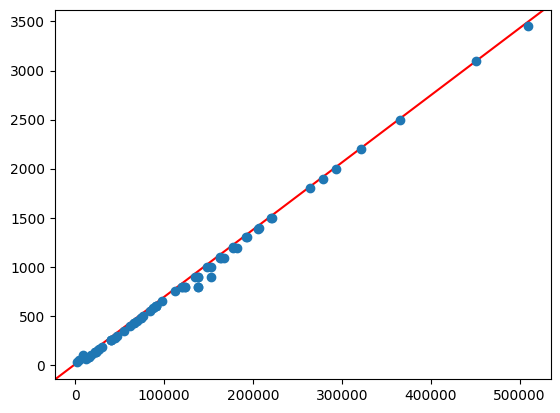

In [8]:
# get x, y coord data
x = df['points']
y = df['price']

# plot points to prices on graph
plt.scatter(x, y)

# plot polynomial gradient
s, i = np.polyfit(x, y, 1)
plt.axline((x.iloc[0], y.iloc[0]),
            slope=s,
            color='red',
            zorder=0)

plt.show()

There is a linear co-relation of points to price. More points are needed to get the higher priced items. *Not surprising.*

# Value For Money (price per point)

The following visualization shows where the most value for each point is.

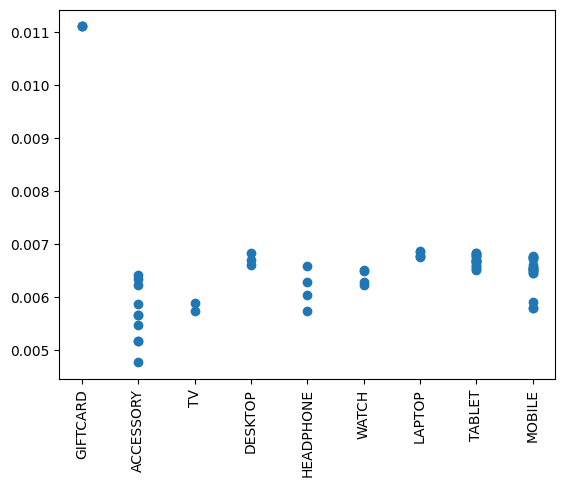

In [9]:
# get x & compute y data
x = df['type']
y = df['price']/df['points']

# plot points
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.show()

The above graph shows that the value for money is when purchasing a gift card, 1.11¢ per point. The rest of products are clustered in the 0.05¢-0.07¢ per point range.

# Buying Decision

Having 49,037 points to be redeemed, and most value was redeeming the gift cards.

Points & Dollars
*   3 x \$25 Apple Gift Card  = 3 * 2,250 = 6,750 = \$75
*   3 x \$50 Apple Gift Card  = 3 * 4,500 = 13,500 = \$150
*   3 x \$100 Apple Gift Card = 3 * 9,000 = 27,000 = \$300
*   Total = 47,250 = \$525

In [10]:
# filter out gift cards, find all products purchasable using gift cards
price_list = df[3:]
price_list = price_list[price_list['price'] < 525.00]
print(f'Use gift cards to order {len(price_list)} items')
price_list

Use gift cards to order 24 items


,type,product,points,price
3,ACCESSORY,35W Dual USB-C Port Compact Power Adapter,12400,59.0
4,ACCESSORY,USB SuperDrive,15300,79.0
5,ACCESSORY,96W USB-C Power Adapter,15300,79.0
6,ACCESSORY,HomePod mini,18100,99.0
7,ACCESSORY,Magic Keyboard with Numeric Keypad,22800,129.0
8,ACCESSORY,Magic Trackpad - White,22800,129.0
9,ACCESSORY,Smart Keyboard for iPad (9th Gen),27100,159.0
10,ACCESSORY,Magic Keyboard Folio for iPad (10th Gen),40000,249.0
11,ACCESSORY,"11"" Magic Keyboard for iPad Pro (4th Gen) and ...",47200,299.0
12,ACCESSORY,"12.9"" Magic Keyboard for iPad Pro (6th Gen)",54400,349.0
